*This notebook is an example of how to visualize and analyze .swc files with neuron morphologies at BIL using Open OnDemand*

### Let's begin.
To visualize neuron morphologies, we need to install `neurom`, the Python library for neuron morphology analysis<br>
https://github.com/BlueBrain/NeuroM<br>
https://neurom.readthedocs.io/en/stable/<br>
SWC files are structured according to the swc specification: http://www.neuronland.org/NLMorphologyConverter/MorphologyFormats/SWC/Spec.html

In [ ]:
!pip install --user neurom

# When you use the NeuroM software, you are requested to cite the following 
# (this includes poster presentations) : https://doi.org/10.5281/zenodo.6524037 

#### Create a directory for outputs

In [1]:
!if [ ! -d ~/workshop ]; then mkdir ~/workshop; fi

#### Import all requiered modules

In [2]:
import os

import matplotlib.pyplot as plt
import neurom as nm
from neurom import morphmath as mm
from neurom.core.types import NeuriteType
from neurom.core.types import tree_type_checker, NEURITES
from neurom.core import Section
from neurom.features import section
from neurom.view import matplotlib_utils, matplotlib_impl
from neurom import geom

#### Let's search for a neuron morphology file:

Go to https://submit.brainimagelibrary.org/search and search for **cell morphology** modality.<br>

The example below visualizes the following dataset:<br>
PI: Ed Lein, Allen Institute for Brain Science<br>
Modality: cell morphology<br>
Method: manual tracing<br>
Technique: PATCH-Seq<br>
Structure: MTG (Middle temporal gyrus)<br>
Organism: human<br>

In [3]:
swc_folder = "/bil/data/d6/d1/d6d13d0d30ebbb32/689300528/"  # copied from BIL website

In [4]:
!ls {swc_folder}  # shell command with python variable substituted

689300528.marker  689300528_raw.swc  689300528_transformed.swc


In [5]:
swc_file_name = "689300528_transformed.swc"  # copied from the above 'ls' outputs

In [6]:
path_to_swc = os.path.join(swc_folder, swc_file_name)

### Let's check that the morphology is valid

In [7]:
!neurom check {path_to_swc} -o ~/workshop/checks.json  # shell command

In [8]:
!cat ~/workshop/checks.json  # shell command

{
    "files": {
        "/bil/data/d6/d1/d6d13d0d30ebbb32/689300528/689300528_transformed.swc": {
            "Has basal dendrite": true,
            "Has axon": true,
            "Has apical dendrite": true,
            "Has all nonzero segment lengths": true,
            "Has all nonzero section lengths": true,
            "Has all nonzero neurite radii": true,
            "Has nonzero soma radius": true,
            "ALL": true
        }
    },
    "STATUS": "PASS"
}

#### Let's get basic statistics

In [9]:
!neurom stats {path_to_swc}  # shell command

{
  "689300528_transformed.swc":{
    "axon":{
      "max_section_lengths":660.3916625976562,
      "sum_section_lengths":8456.869140625,
      "sum_section_volumes":347.8262966590131,
      "max_section_branch_orders":18
    },
    "apical_dendrite":{
      "max_section_lengths":322.519287109375,
      "sum_section_lengths":2450.770751953125,
      "sum_section_volumes":636.8211423373089,
      "max_section_branch_orders":11
    },
    "basal_dendrite":{
      "max_section_lengths":223.7005157470703,
      "sum_section_lengths":1924.406982421875,
      "sum_section_volumes":446.6767529863447,
      "max_section_branch_orders":5
    },
    "all":{
      "max_section_lengths":660.3916625976562,
      "sum_section_lengths":12832.046875,
      "sum_section_volumes":1431.3241919826667,
      "max_section_branch_orders":18
    },
    "morphology":{
      "mean_soma_radius":4.251699924468994
    }
  }
}


### Let's plot a dendrogram, to understand the neuron structure

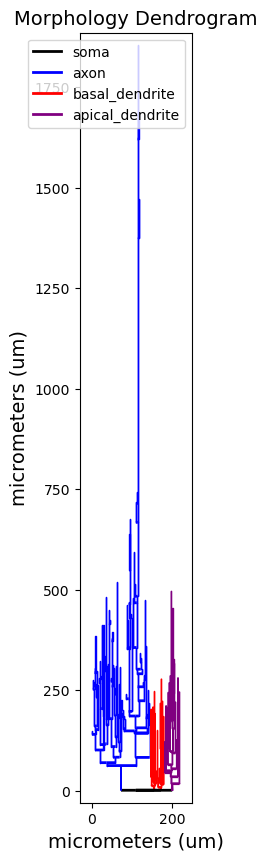

In [10]:
plt.rcParams['figure.figsize'] = [2, 10]
morphology = nm.load_morphology(path_to_swc)
fig, ax = matplotlib_utils.get_figure()
matplotlib_impl.plot_dendrogram(morphology, ax=ax)
matplotlib_utils.plot_style(fig=fig, ax=ax)

#### Let's plot the morphology (in 2d and 3d)

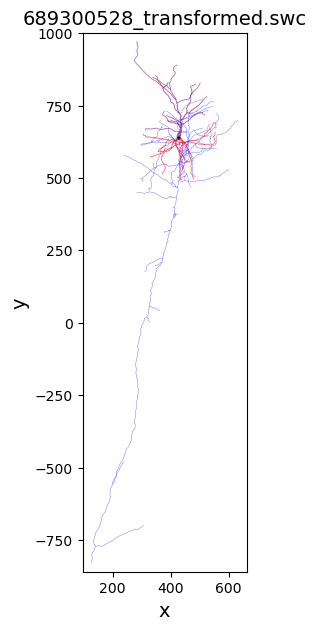

In [11]:
plt.rcParams['figure.figsize'] = [7, 7]
fig, ax = matplotlib_utils.get_figure()
matplotlib_impl.plot_morph(morphology, ax=ax)
matplotlib_utils.plot_style(fig=fig, ax=ax)

In [12]:
#To save figure as a PNG file
output_path='workshop/'
matplotlib_utils.save_plot(fig=fig, output_path=output_path)

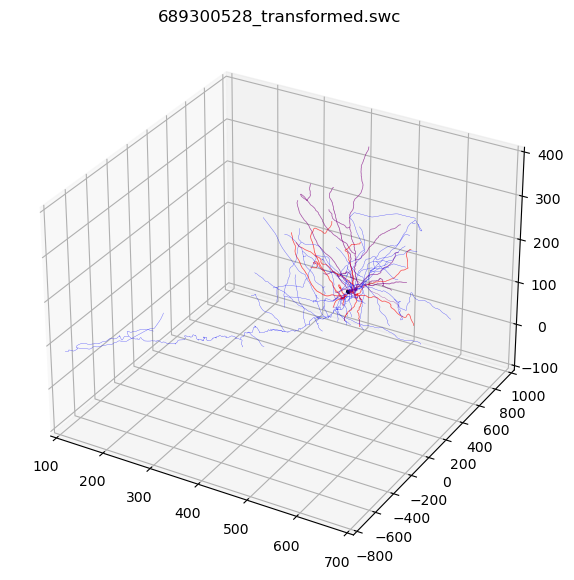

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(100, 700)
ax.set_ylim(-800, 1000)
ax.set_zlim(-100, 400)
matplotlib_impl.plot_morph3d(morphology, ax=ax)

#### Let's get quantitative characteristics of the neuron

In [14]:
ap_seg_len = nm.get('segment_lengths', morphology, neurite_type=nm.APICAL_DENDRITE)
ax_sec_len = nm.get('section_lengths', morphology, neurite_type=nm.AXON)
num_neurites = nm.get('number_of_neurites', morphology, neurite_type=NeuriteType.all)
depth_neurites = nm.get('total_depth', morphology, neurite_type=NeuriteType.all)
height_neurites = nm.get('total_height', morphology, neurite_type=NeuriteType.all)
width_neurites = nm.get('total_width', morphology, neurite_type=NeuriteType.all)
print('Number of neurites:', num_neurites)
print('Total Depth (all neurites):', depth_neurites)
print('Total Height (all neurites):', height_neurites)
print('Total Width (all neurites):', width_neurites)

Total Depth (all neurites): 343.80316
Total Height (all neurites): 1800.8228
Total Width (all neurites): 506.6363


In [15]:
print('Total neurite length (segments):',
          sum(mm.segment_length(s) for s in nm.iter_segments(morphology)))

# get volume of all neurites in cell by summing over segment
# volumes
print('Total neurite volume:',
          sum(mm.segment_volume(s) for s in nm.iter_segments(morphology)))

# get area of all neurites in cell by summing over segment
# areas
print('Total neurite surface area:',
          sum(mm.segment_area(s) for s in nm.iter_segments(morphology)))


Total neurite length (segments): 12832.047173917294
Total neurite volume: 1431.3241919826648
Total neurite surface area: 13328.782647868355


In [16]:
# Number of bifurcation points.
print('Number of bifurcation points:',
          sum(1 for _ in nm.iter_sections(morphology,
                            iterator_type=Section.ibifurcation_point)))

# Number of bifurcation points for apical dendrites
print('Number of bifurcation points (apical dendrites):',
          sum(1 for _ in nm.iter_sections(morphology,
                            iterator_type=Section.ibifurcation_point,
                            neurite_filter=tree_type_checker(nm.APICAL_DENDRITE))))

# Maximum branch order
print('Maximum branch order:',
          max(section.branch_order(s) for s in nm.iter_sections(morphology)))

Number of bifurcation points: 89
Number of bifurcation points (apical dendrites): 13
Maximum branch order: 18


In [17]:
# Morphology's bounding box
# Note: does not account for soma radius
print('Bounding box ((min x, y, z), (max x, y, z))', geom.bounding_box(morphology))

Bounding box ((min x, y, z), (max x, y, z)) [[ 125.48033  -829.5039      9.669616]
 [ 632.11664   971.3189    353.47278 ]]
